When testing the frequency cut-off.

For the highpass, once it is done too high, there is nothing found anymore. However, when the abalysis is done by cutting pieces of the signal in time, we see that the signal can be found even if only the merger part is present, which means that we have the possibility to see only the highest frequencies. So, both seem to be incoherent. However, it could be that the difference comes from the fact that in the highpass, we also cut the filter. In order to see if the problem comes from the fact that the noise is also cut, we can redo the analysis, once cutting the noise as well and once doing the highpass filter only on the signal. We still test with the GW170814 event

In [1]:
#for beautiful plots


%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

In [2]:
from pycbc.catalog import Merger
from pycbc.filter import resample_to_delta_t, highpass
from pycbc.psd import interpolate, inverse_spectrum_truncation
from pycbc.waveform import get_fd_waveform
from pycbc.filter import matched_filter
import numpy


m = Merger("GW170814")
ts_han = m.strain('H1')
ts_liv = m.strain('L1')
ts_vir = m.strain('V1')

### Cutoff done for the full signal (noise+data)

/home/justin/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family [u'normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


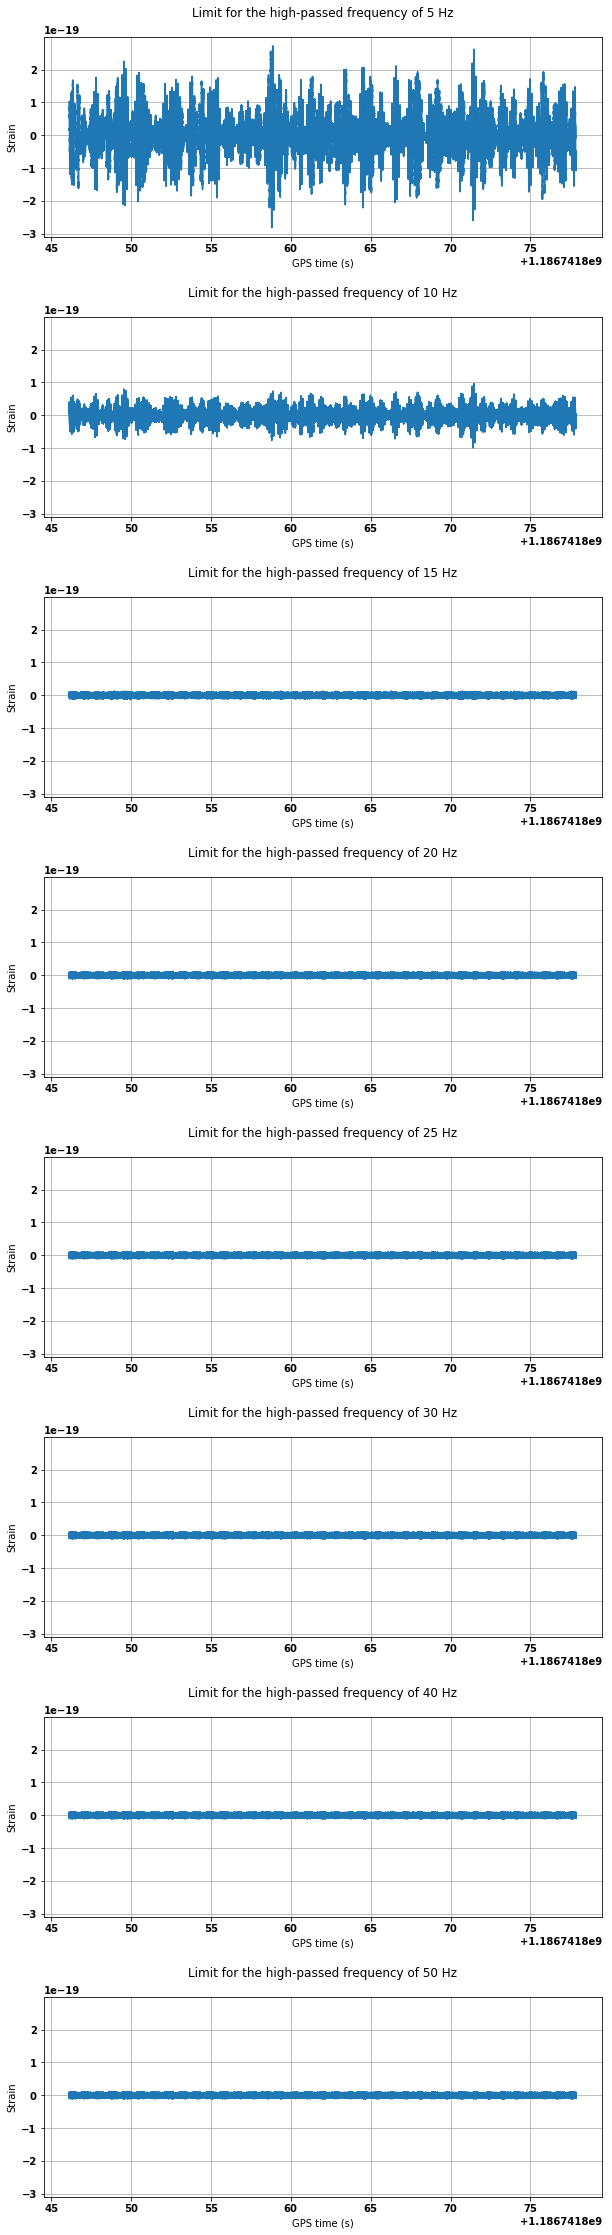

In [3]:
low_freq=[5,10,15,20,25,30,40,50]
high_passed=[0 for i in range(len(low_freq))]
f=plt.figure(figsize=[10,30])
f.subplots_adjust(bottom=18, top=19, wspace= 0.4, hspace=0.4)
ax=f.subplots(nrows=len(low_freq), sharey=True)
for i in range(len(low_freq)):
    high_passed[i]=ts_liv.highpass_fir(low_freq[i], 512)
    ax[i].plot(high_passed[i].sample_times, high_passed[i])
    ax[i].set_title("Limit for the high-passed frequency of %i Hz" %low_freq[i], pad=20)
    ax[i].set_xlabel("GPS time (s)")
    ax[i].set_ylabel("Strain")
    ax[i].grid()

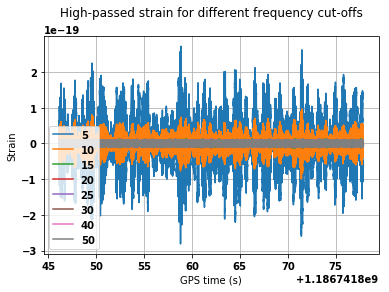

In [4]:
#on the same plot

for i in range(len(low_freq)):
    plt.plot(high_passed[i].sample_times, high_passed[i], label=low_freq[i])
plt.title("High-passed strain for different frequency cut-offs", pad=20)
plt.xlabel("GPS time (s)")
plt.ylabel("Strain")
plt.grid()
plt.legend(loc="best")

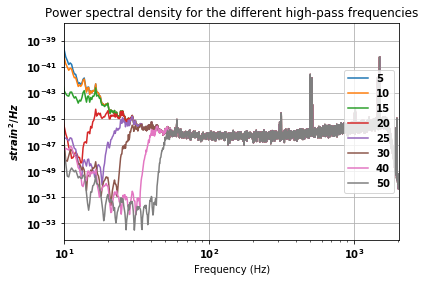

In [5]:
psds=[0 for i in range(len(high_passed))]
for i in range(len(high_passed)):
    psd=high_passed[i].psd(4)
    plt.loglog(psd.sample_frequencies, psd, label=low_freq[i])
    psds[i]=psd
plt.xlabel("Frequency (Hz)")
plt.ylabel("$strain^2/Hz$")
plt.xlim(10,2048)
plt.legend(loc="right")
plt.title("Power spectral density for the different high-pass frequencies")
plt.grid()

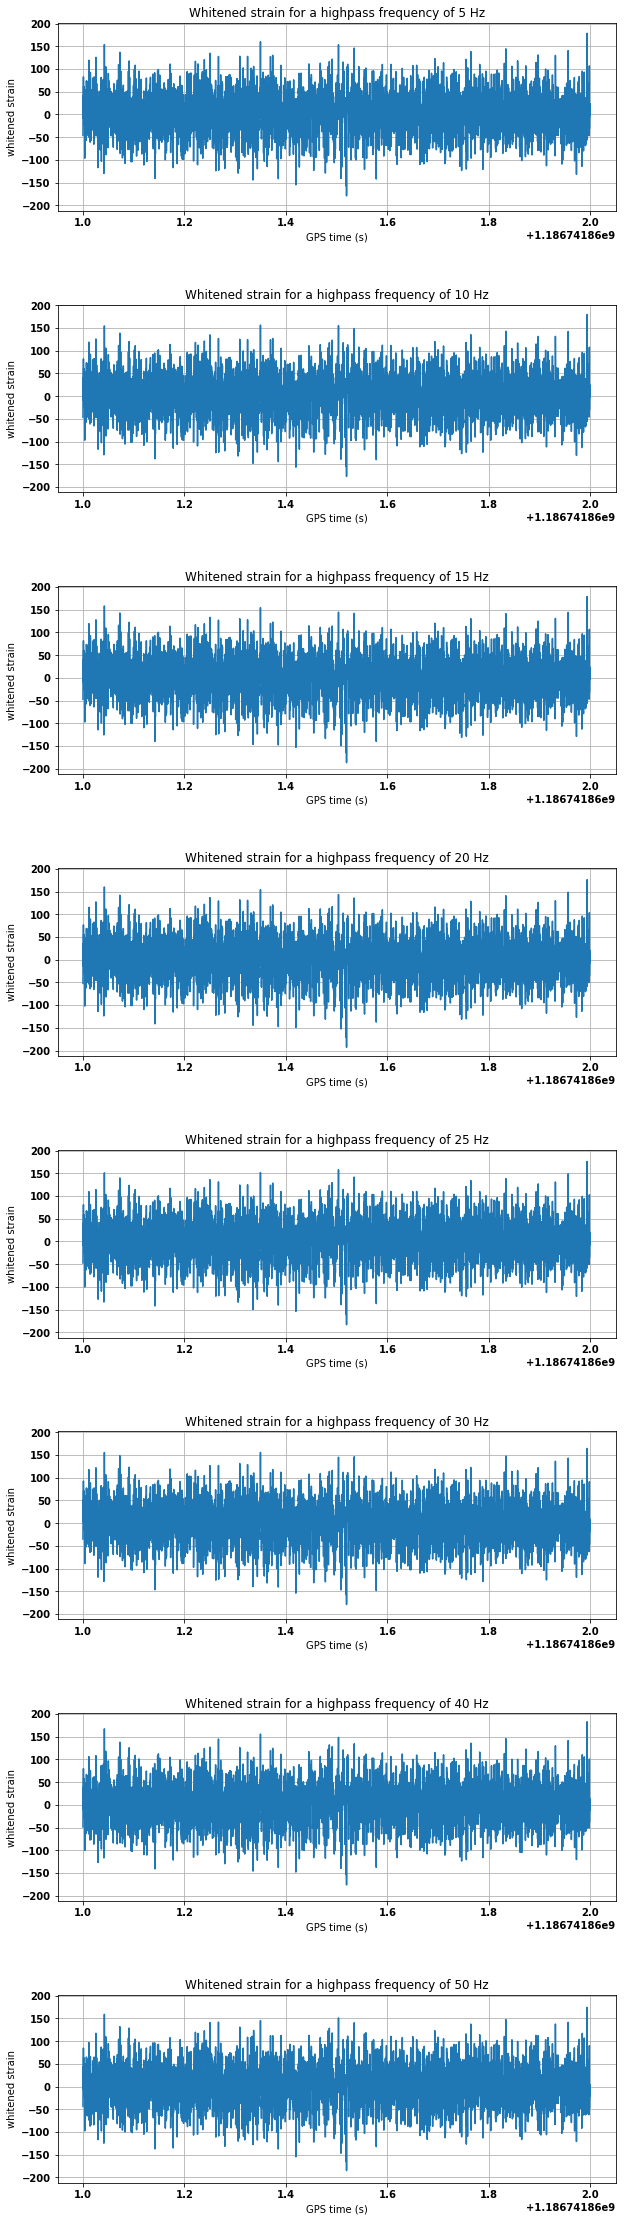

In [6]:
#we can whiten with the PSD that has been built
whitened_passed=[0 for i in range(len(low_freq))]
f=plt.figure(figsize=[10,15])
ax=f.subplots(nrows=len(low_freq), sharey=True)
f.subplots_adjust(bottom=18, top=20, wspace= 0.4, hspace=0.5)
j=0
for i in range(len(low_freq)):
    whitened_passed[i]=high_passed[i].whiten(3,3)
    zoom=whitened_passed[i].time_slice(m.time-0.5, m.time+0.5)
    ax[j].plot(zoom.sample_times, zoom)
    ax[j].set_xlabel("GPS time (s)")
    ax[j].set_ylabel("whitened strain")
    ax[j].set_title("Whitened strain for a highpass frequency of %i Hz" %low_freq[i])
    ax[j].grid()
    j+=1

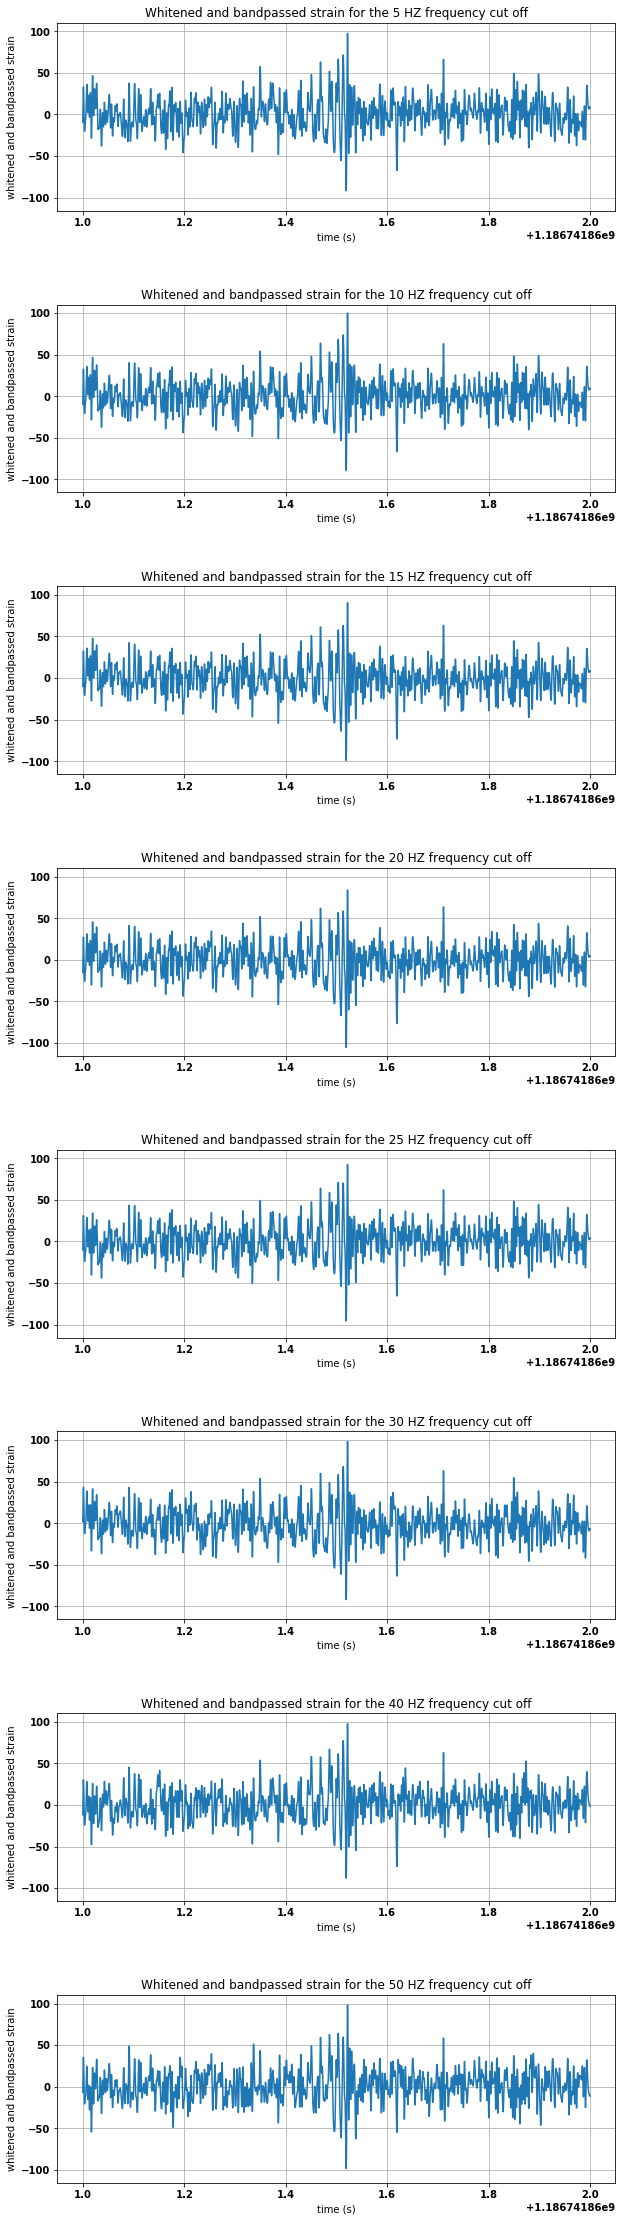

In [7]:
bsps=[0 for i in range(len(low_freq))]
f=plt.figure(figsize=[10,15])
ax=f.subplots(nrows=len(low_freq), sharey=True)
f.subplots_adjust(bottom=18, top=20, wspace= 0.4, hspace=0.5)
j=0

for i in range(len(low_freq)):
    bsps[i]=whitened_passed[i].lowpass_fir(300,512)
    zoom=bsps[i].time_slice(m.time-0.5, m.time+0.5)
    ax[j].plot(zoom.sample_times, zoom)
    ax[j].set_xlabel("time (s)")
    ax[j].set_ylabel("whitened and bandpassed strain")
    ax[j].set_title("Whitened and bandpassed strain for the %i HZ frequency cut off" %low_freq[i])
    ax[j].grid()
    j+=1

/home/justin/.local/lib/python2.7/site-packages/matplotlib/axes/_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


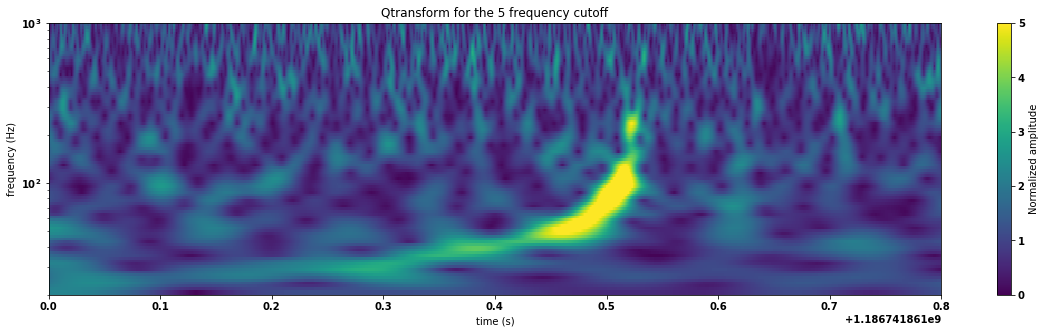

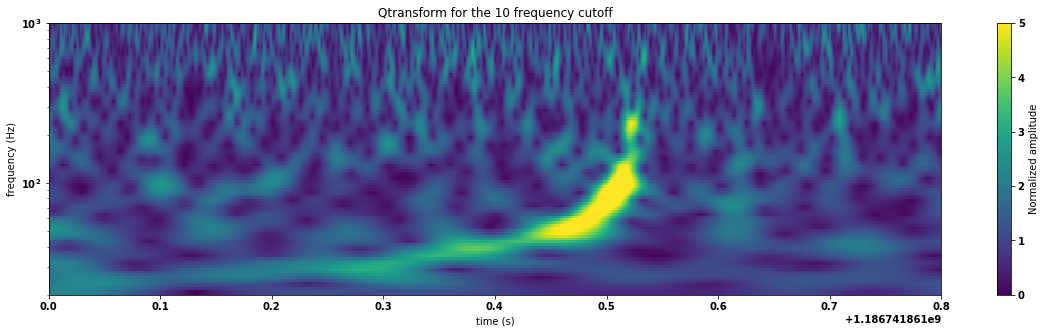

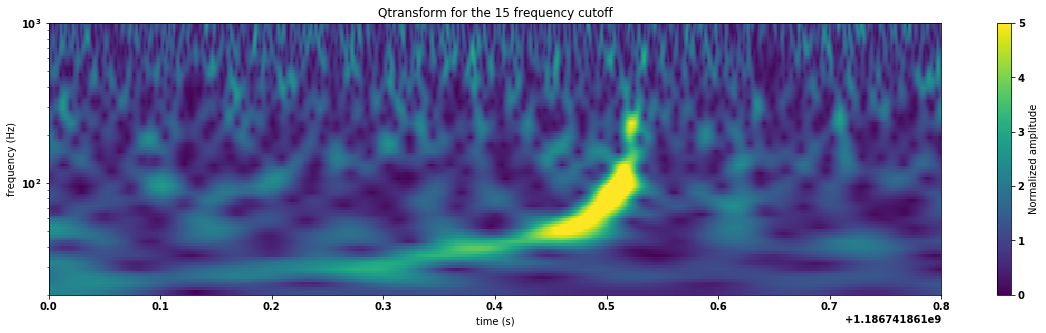

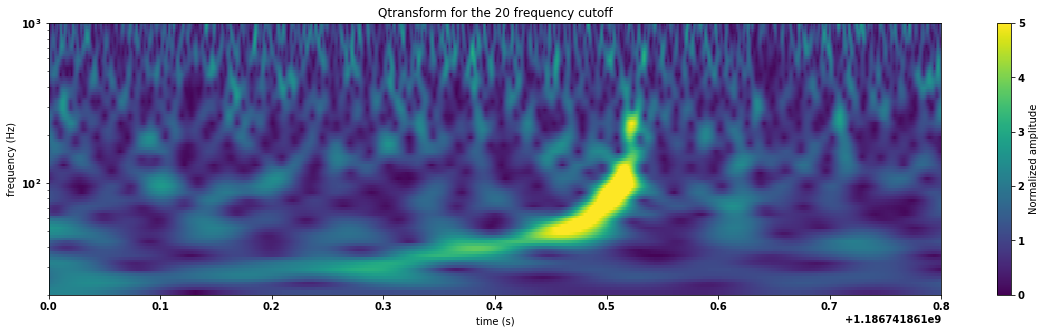

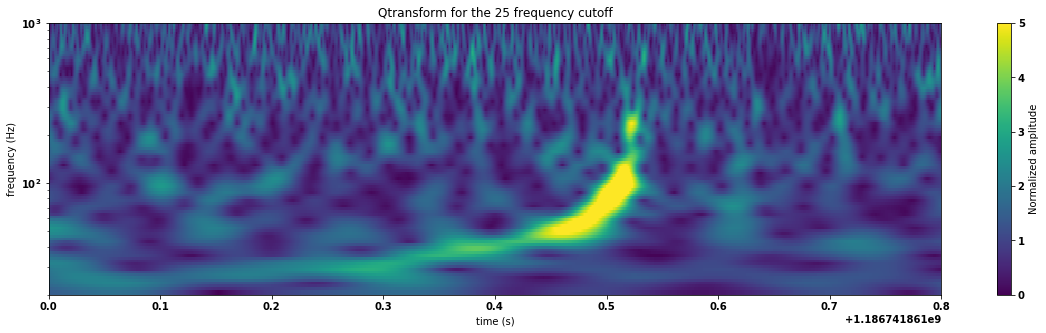

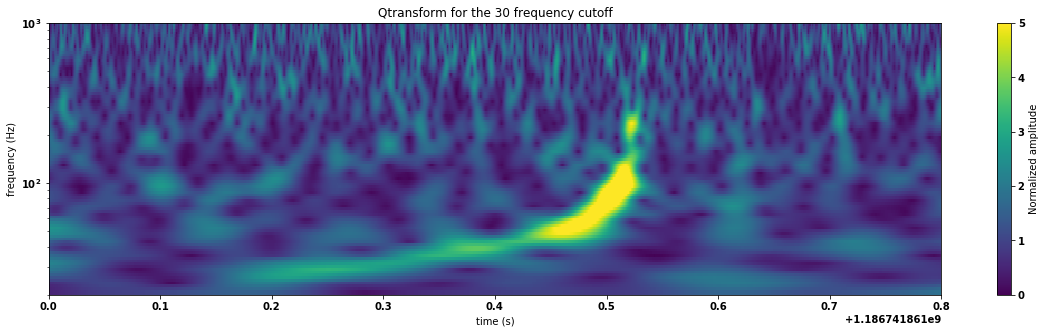

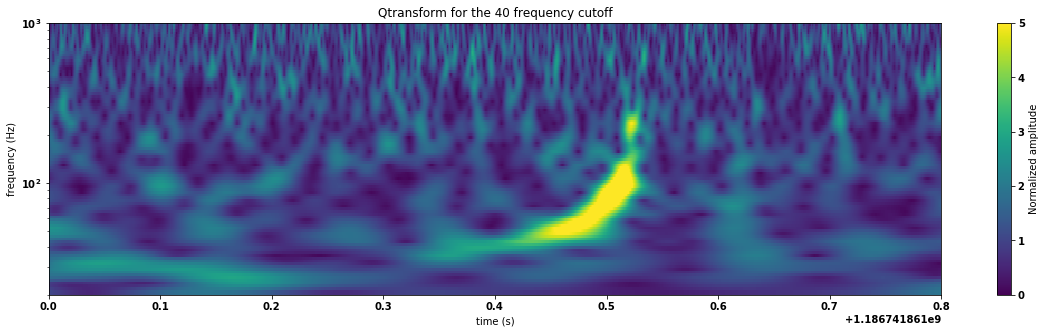

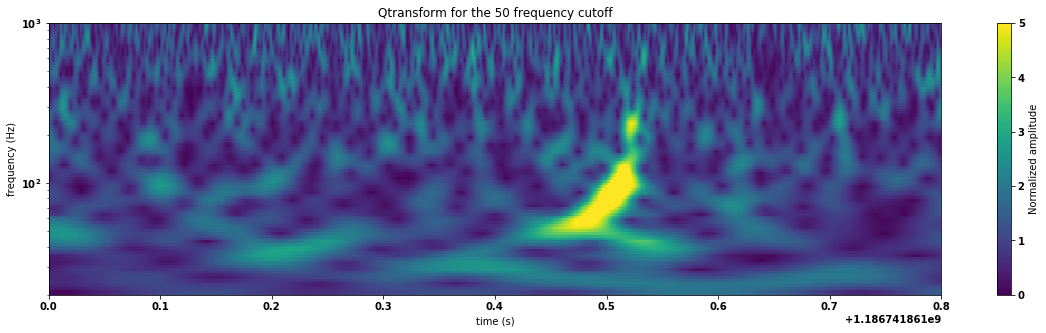

In [8]:
for i in range(len(low_freq)):
    zoom=whitened_passed[i].time_slice(m.time-5, m.time+5)
    times, freqs, power = zoom.qtransform(0.001, logfsteps=100 , qrange=(10,10), frange=(20,1000))
    plt.figure(figsize=(20,5))
    plt.pcolormesh(times, freqs, power**0.5, vmin=0, vmax=5)
    plt.xlim(m.time-0.5, m.time+0.3)
    plt.title("Qtransform for the %i frequency cutoff" %low_freq[i])
    plt.yscale('log')
    plt.xlabel("time (s)")
    plt.ylabel("frequency (Hz)")
    plt.ylim(0,1000)
    cbar = plt.colorbar()
    cbar.ax.set_ylabel("Normalized amplitude")

We found a signal at 1186741861.5244141s with a SNR of 12.7389989 for the 5 Hz frequency cutoff
We found a signal at 1186741861.5244141s with a SNR of 12.7532883 for the 10 Hz frequency cutoff
We found a signal at 1186741861.5244141s with a SNR of 12.7558288 for the 15 Hz frequency cutoff
We found a signal at 1186741861.5244141s with a SNR of 12.6303018 for the 20 Hz frequency cutoff
We found a signal at 1186741855.7783203s with a SNR of 7.7884898 for the 25 Hz frequency cutoff
We found a signal at 1186741869.7451172s with a SNR of 3.2869577 for the 30 Hz frequency cutoff
We found a signal at 1186741871.1215820s with a SNR of 3.8189743 for the 40 Hz frequency cutoff
We found a signal at 1186741856.5961914s with a SNR of 3.6160913 for the 50 Hz frequency cutoff


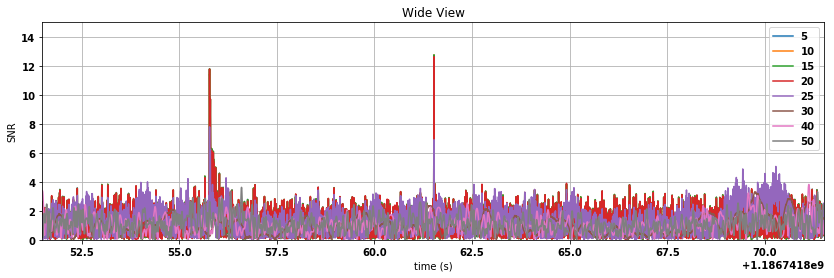

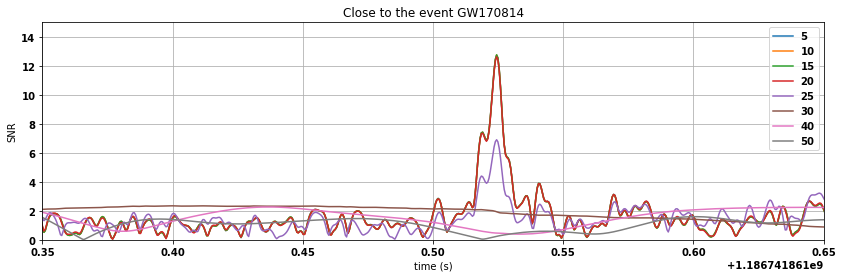

In [9]:
#data analysis SNR
m= Merger("GW170814")
data=m.strain('L1')
low_freq=[5,10,15,20,25,30,40,50]
high_passed=[0 for i in range(len(low_freq))]
psds=[0 for i in range(len(high_passed))]
snr=[0 for i in range(len(high_passed))]
peaks=[0 for i in range(len(high_passed))]
snrp=[0 for i in range(len(high_passed))]
times=[0 for i in range(len(high_passed))]

for i in range(len(low_freq)):
    #data conditioning
    high_passed[i]=data.highpass_fir(low_freq[i], 512)
    high_passed[i]=resample_to_delta_t(high_passed[i], 1.0/2048)
    high_passed[i].crop(2,2)
    #psd calculation
    psd=high_passed[i].psd(3)
    psd=interpolate(psd, high_passed[i].delta_f)
    psd=inverse_spectrum_truncation(psd, 2*high_passed[i].sample_rate, low_frequency_cutoff=15.0)
    psds[i]=psd
    hp, hf = get_fd_waveform(approximant="IMRPhenomD",
                         mass1=30.5, mass2=25.3, spin1z=-0.56879753, spin2z=0.13079314, distance=540, inclination=0.6,
                         f_lower=20.0, delta_f=high_passed[i].delta_f, f_final=739.0645)
    hp.resize(len(psds[i]))
    template=hp.cyclic_time_shift(hp.start_time)
    snr[i]=matched_filter(template, high_passed[i], psd=psds[i], low_frequency_cutoff=20)
    snr[i] = snr[i].crop(5, 4) 

for w, title in [(10, 'Wide View'), (.15, 'Close to the event GW170814')]:
    plt.figure(figsize=(14,4))
    for i in range(len(low_freq)):
        plt.plot(snr[i].sample_times, abs(snr[i]), label=low_freq[i])
        if(w==10):
            peaks[i]=abs(snr[i]).numpy().argmax()
            snrp[i]=snr[i][peaks[i]]
            times[i]=snr[i].sample_times[peaks[i]]
            print("We found a signal at %.7fs with a SNR of %.7f for the %i Hz frequency cutoff" %(times[i], abs(snrp[i]), low_freq[i]))
    plt.legend(loc='best')
    plt.title(title)
    plt.grid()
    plt.xlim(m.time-w, m.time+w)
    plt.ylim(0,15)
    plt.xlabel("time (s)")
    plt.ylabel("SNR")

When the analysis is done like that, once 30Hz is reached, it does not work anymore. 

## Highpass

Try to see what happense if we force a value for the PSD taht is not oscillating but has a fixed value of the plateau.


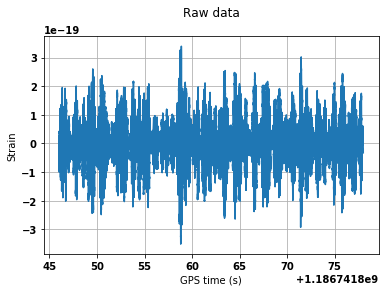

In [18]:
from pycbc.catalog import Merger
m= Merger("GW170814")
data=m.strain('L1')
plt.plot(data.sample_times, data)
plt.xlabel("GPS time (s)")
plt.ylabel("Strain")
plt.title('Raw data', pad=20)
plt.grid()

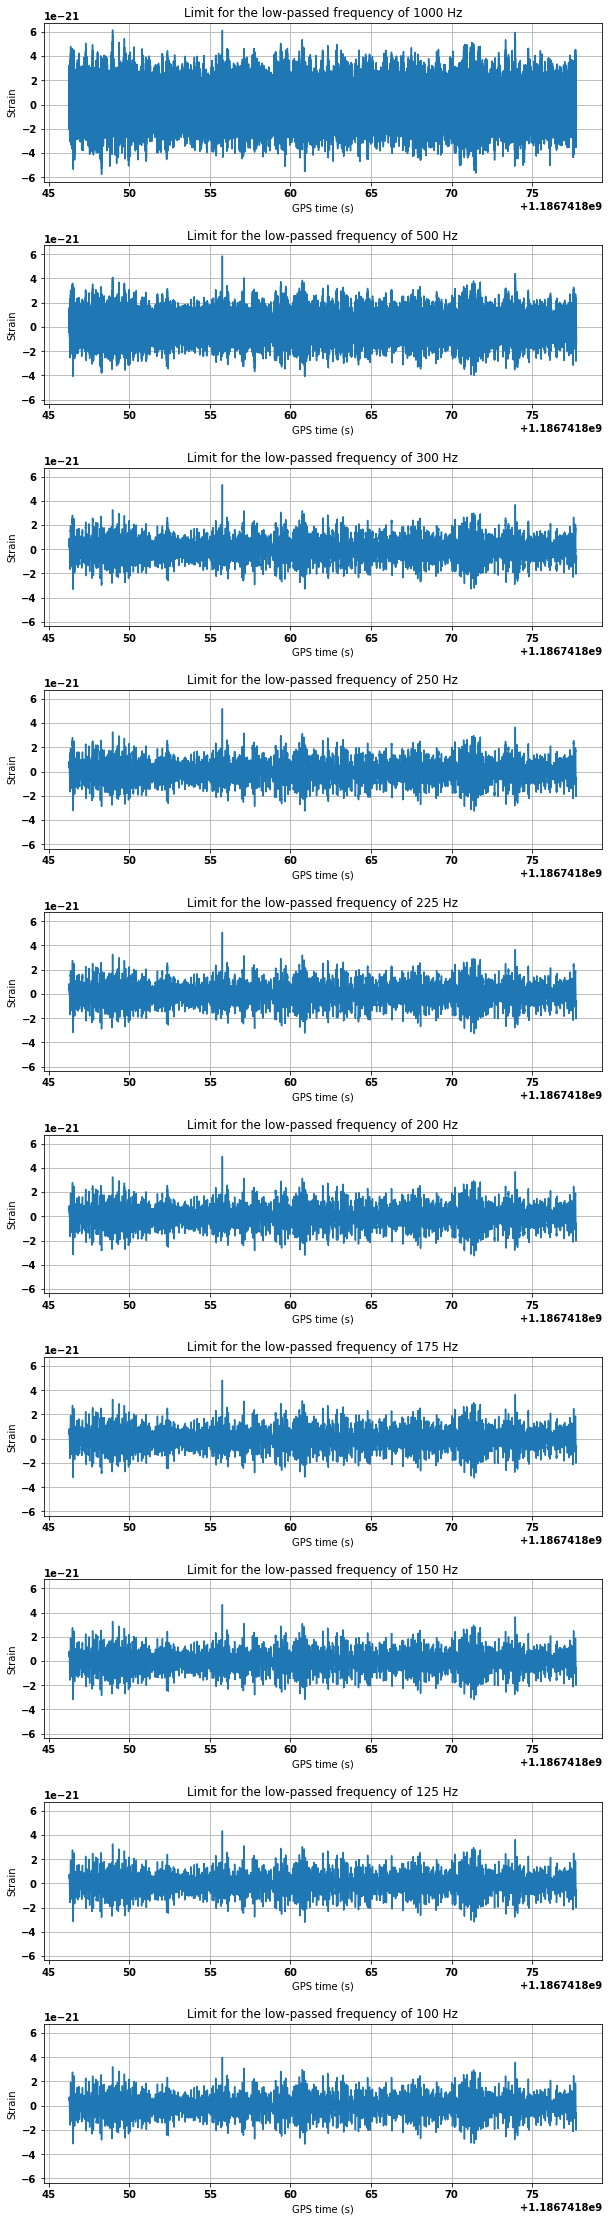

In [19]:
high_freq=[1000,500,300,250,225,200,175,150,125,100]
low_passed=[0 for i in range(len(high_freq))]
f=plt.figure(figsize=[10,30])
f.subplots_adjust(bottom=18, top=19, wspace= 0.4, hspace=0.4)
ax=f.subplots(nrows=len(high_freq), sharey=True)
for i in range(len(high_freq)):
    low_passed[i]=data.highpass_fir(15,512).lowpass_fir(high_freq[i], 512)
    low_passed[i].crop(2,2)
    ax[i].plot(low_passed[i].sample_times, low_passed[i])
    ax[i].set_title("Limit for the low-passed frequency of %i Hz" %high_freq[i])
    ax[i].set_xlabel("GPS time (s)")
    ax[i].set_ylabel("Strain")
    ax[i].grid()

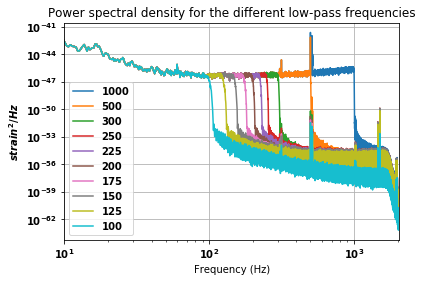

In [20]:
#we first build the normal PSD, which we will modify afterwards to see if 
# it enables to do that
psds=[0 for i in range(len(low_passed))]
for i in range(len(low_passed)):
    psd=low_passed[i].psd(3)
    psd = interpolate(psd, low_passed[i].delta_f)
    #psd = inverse_spectrum_truncation(psd, 2*low_passed[i].sample_rate, low_frequency_cutoff=15.0)
    plt.loglog(psd.sample_frequencies, psd, label=high_freq[i])
    psds[i]=psd
plt.xlabel("Frequency (Hz)")
plt.ylabel("$strain^2/Hz$")
plt.xlim(10,2048)
plt.legend(loc="lower left")
plt.title("Power spectral density for the different low-pass frequencies")
plt.grid()

The number of samples that should be talen into accound is given by the frequency cutoff divided by the delta_f

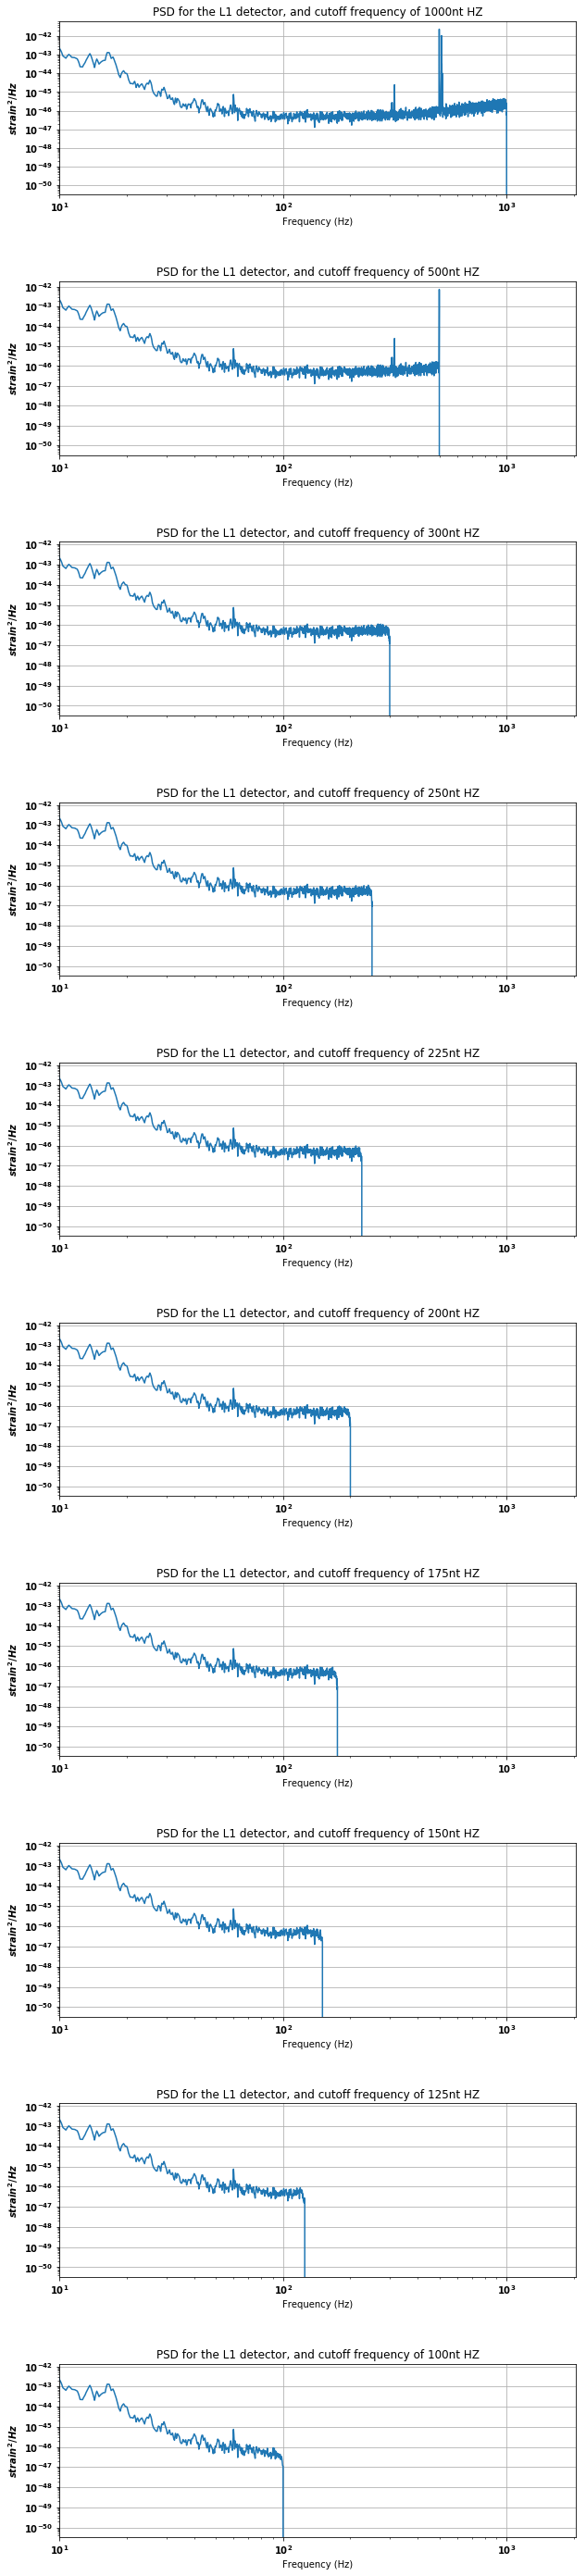

In [21]:
#we compute the number of samples and make flat all what is behind it

samples = []

mod_psd = [psds[i] for i in range(len(psds))]
for i in range(len(psds)):
    samp = int(high_freq[i]/psds[i].delta_f)
    for j in range(samp):
        mod_psd[i][j] = psds[i][j]
    for j in range(samp+1, len(psds[i]), 1):
        mod_psd[i][j] = 0
    
f = plt.figure(figsize = [10,50])
ax = f.subplots(nrows = len(psds))
f.subplots_adjust(hspace = 0.5)

for k in range(len(psds)):
    ax[k].loglog(mod_psd[k].sample_frequencies, mod_psd[k])
    ax[k].set_title("PSD for the L1 detector, and cutoff frequency of %int HZ" %high_freq[k])
    ax[k].set_xlabel("Frequency (Hz)")
    ax[k].set_ylabel("$strain^2/Hz$")
    ax[k].set_xlim(10,2048)
    ax[k].grid()
    
    

In [22]:
#make the waveforms
temps = []

for i in range(len(mod_psd)):
    hp, hf = get_fd_waveform(approximant="IMRPhenomD",
                         mass1=30.5, mass2=25.3, spin1z=-0.56879753, spin2z=0.13079314, distance=540, inclination=0.6,
                         f_lower=20.0, delta_f=low_passed[i].delta_f, f_final=739.0645)
    hp.resize(len(mod_psd[i]))
    template=hp.cyclic_time_shift(hp.start_time)
    temps.append(template)

In [23]:
print(len(temps[i]), len(psds[i]))

(64513, 64513)


In [24]:
#SNRS

snrs=[]

for i in range(len(mod_psd)):
    low_passed[i] = resample_to_delta_t(low_passed[i], 1.0/2048)
    print(len(temps[i]), len(low_passed[i]))
    #snr = matched_filter(temps[i], low_passed[i], psd=mod_psd[i], low_frequency_cutoff = 20.0)
    #snr = snr.crop(5,4)
    #snrs.append(snr)

(64513, 64512)
(64513, 64512)
(64513, 64512)
(64513, 64512)
(64513, 64512)
(64513, 64512)
(64513, 64512)
(64513, 64512)
(64513, 64512)
(64513, 64512)


We found a signal at 1186741861.5244141s with a SNR of 12.7027454 for the 1000 Hz frequency cutoff
We found a signal at 1186741869.8266602s with a SNR of 60844.9449126 for the 500 Hz frequency cutoff
We found a signal at 1186741862.8012695s with a SNR of 30104.0106966 for the 300 Hz frequency cutoff
We found a signal at 1186741864.2810059s with a SNR of 22023.1339701 for the 250 Hz frequency cutoff
We found a signal at 1186741855.8020020s with a SNR of 16888.8859370 for the 225 Hz frequency cutoff
We found a signal at 1186741856.5187988s with a SNR of 14385.2262180 for the 200 Hz frequency cutoff
We found a signal at 1186741852.4111328s with a SNR of 15484.2730101 for the 175 Hz frequency cutoff
We found a signal at 1186741870.1528320s with a SNR of 14357.3305977 for the 150 Hz frequency cutoff
We found a signal at 1186741855.7993164s with a SNR of 18365.0751853 for the 125 Hz frequency cutoff
We found a signal at 1186741855.8059082s with a SNR of 15544.7118125 for the 100 Hz frequency

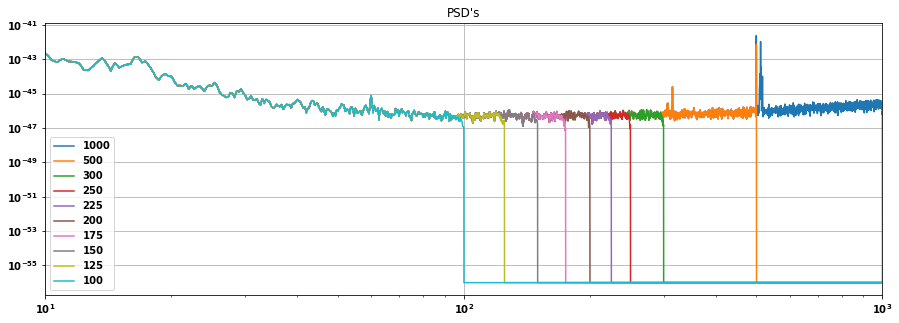

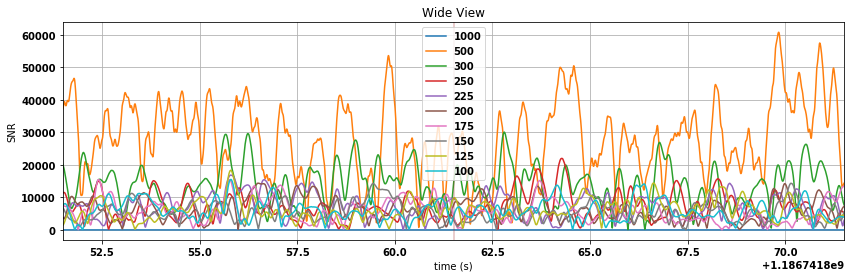

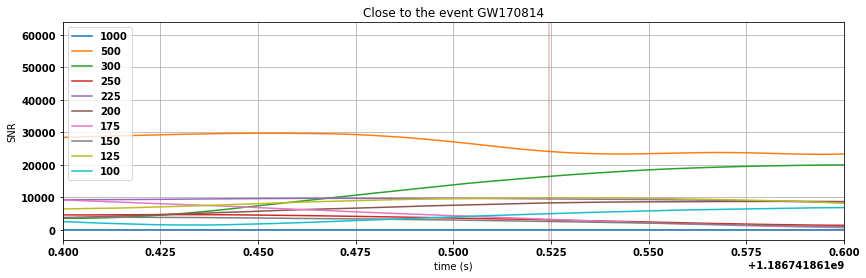

In [25]:
high_freq=[1000,500,300,250,225,200,175,150,125,100]
m= Merger("GW170814")
data=m.strain('L1')
low_passed=[0 for i in range(len(high_freq))]
snr=[0 for i in range(len(low_passed))]
peaks=[0 for i in range(len(low_passed))]
snrp=[0 for i in range(len(low_passed))]
times=[0 for i in range(len(low_passed))]
mod_psds = [[] for i in range(len(low_passed))]
samples = [0 for i in range(len(low_passed))]

plt.figure(figsize=(15,5))
for i in range(len(high_freq)):
    #data conditioning
    low_passed[i]=data.highpass_fir(15, 512).lowpass_fir(high_freq[i],512)
    #low_passed[i]=resample_to_delta_t(low_passed[i], 1.0/2048)
    low_passed[i].crop(2,2)
    #psd calculation
    psd=low_passed[i].psd(3)
    psd=interpolate(psd, low_passed[i].delta_f)
    #psd=inverse_spectrum_truncation(psd, 2*low_passed[i].sample_rate, low_frequency_cutoff=15.0)
    samp = int(high_freq[i]/psd.delta_f)
    mod_psds[i] = psd
    for j in range(samp):
        mod_psds[i][j] = psd[j]
    for j in range(samp, len(psd), 1):
        mod_psds[i][j] = 1e-56
    plt.loglog(mod_psds[i].sample_frequencies, mod_psds[i], label=high_freq[i])
    plt.xlim(10,2048)
    hp, hf = get_fd_waveform(approximant="IMRPhenomD",
                         mass1=30.5, mass2=25.3, spin1z=-0.56879753, spin2z=0.13079314, distance=540, inclination=0.6,
                         f_lower=20.0, delta_f=low_passed[i].delta_f, f_final=739.0645)
    hp.resize(len(mod_psds[i]))
    template=hp.cyclic_time_shift(hp.start_time)
    snr[i]=matched_filter(template, low_passed[i], psd=mod_psds[i], low_frequency_cutoff=20)
    snr[i] = snr[i].crop(5, 4)
#plt.loglog(typ_psd.sample_frequencies, typ_psd, alpha=0.5, label="Typical PSD", color='Purple')
plt.legend()
plt.title("PSD's")
plt.grid()
plt.xlim(10,1000)
for w, title in [(10, 'Wide View'), (.1, 'Close to the event GW170814')]:
    plt.figure(figsize=(14,4))
    for i in range(len(high_freq)):
        plt.plot(snr[i].sample_times, abs(snr[i]), label=high_freq[i])
        if(w==10):
            peaks[i]=abs(snr[i]).numpy().argmax()
            snrp[i]=snr[i][peaks[i]]
            times[i]=snr[i].sample_times[peaks[i]]
            print("We found a signal at %.7fs with a SNR of %.7f for the %i Hz frequency cutoff" %(times[i], abs(snrp[i]), high_freq[i]))
    #plt.plot(typ_snr.sample_times, abs(typ_snr), label="Typical SNR", color='Purple')
    plt.legend(loc='best')
    plt.title(title)
    plt.grid()
    plt.xlim(m.time-w, m.time+w)
    plt.axvline(1186741861.5244141, color='Brown', alpha=0.3)
    #plt.ylim(0,20)
    plt.xlabel("time (s)")
    plt.ylabel("SNR")

We found a signal at 1186741861.5244141s with a SNR of 12.7025935 for the 2000 Hz frequency cutoff
We found a signal at 1186741861.5244141s with a SNR of 12.7027429 for the 950 Hz frequency cutoff
We found a signal at 1186741861.5244141s with a SNR of 12.7027359 for the 750 Hz frequency cutoff
We found a signal at 1186741861.9584961s with a SNR of 37512.4478643 for the 600 Hz frequency cutoff


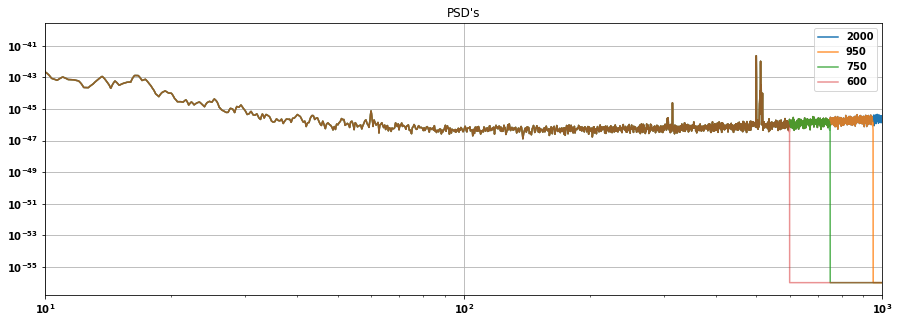

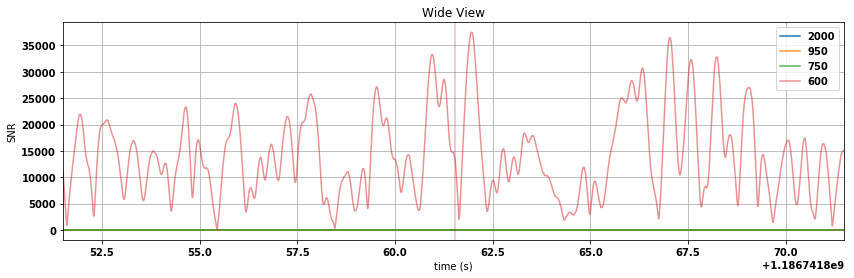

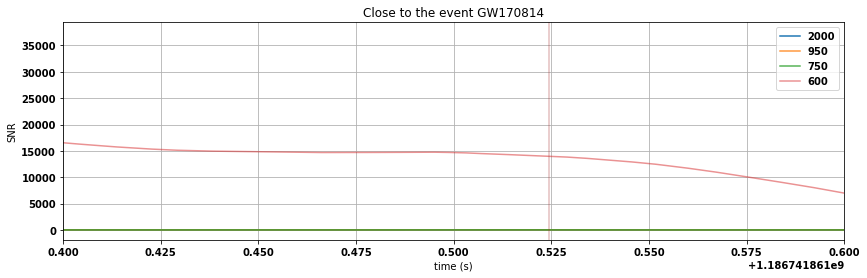

In [27]:
alphas=[1,0.8,0.8,0.5]
high_freq=[2000,950, 750, 600]
m= Merger("GW170814")
data=m.strain('L1')
low_passed=[0 for i in range(len(high_freq))]
snr=[0 for i in range(len(low_passed))]
peaks=[0 for i in range(len(low_passed))]
snrp=[0 for i in range(len(low_passed))]
times=[0 for i in range(len(low_passed))]
mod_psds = [[] for i in range(len(low_passed))]
samples = [0 for i in range(len(low_passed))]

plt.figure(figsize=(15,5))
for i in range(len(high_freq)):
    #data conditioning
    low_passed[i]=data.highpass_fir(15, 512).lowpass_fir(high_freq[i],512)
    #low_passed[i]=resample_to_delta_t(low_passed[i], 1.0/2048)
    low_passed[i].crop(2,2)
    #psd calculation
    psd=low_passed[i].psd(3)
    psd=interpolate(psd, low_passed[i].delta_f)
    #psd=inverse_spectrum_truncation(psd, 2*low_passed[i].sample_rate, low_frequency_cutoff=15.0)
    samp = int(high_freq[i]/psd.delta_f)
    mod_psds[i] = psd
    for j in range(samp):
        mod_psds[i][j] = psd[j]
    for j in range(samp, len(psd), 1):
        mod_psds[i][j] = 1e-56
    plt.loglog(mod_psds[i].sample_frequencies, mod_psds[i],alpha= alphas[i], label=high_freq[i])
    plt.xlim(10,2048)
    hp, hf = get_fd_waveform(approximant="IMRPhenomD",
                         mass1=30.5, mass2=25.3, spin1z=-0.56879753, spin2z=0.13079314, distance=540, inclination=0.6,
                         f_lower=20.0, delta_f=low_passed[i].delta_f, f_final=739.0645)
    hp.resize(len(mod_psds[i]))
    template=hp.cyclic_time_shift(hp.start_time)
    snr[i]=matched_filter(template, low_passed[i], psd=mod_psds[i], low_frequency_cutoff=20)
    snr[i] = snr[i].crop(5, 4)
#plt.loglog(typ_psd.sample_frequencies, typ_psd, alpha=0.5, label="Typical PSD", color='Purple')
plt.legend()
plt.title("PSD's")
plt.grid()
plt.xlim(10,1000)
for w, title in [(10, 'Wide View'), (.1, 'Close to the event GW170814')]:
    plt.figure(figsize=(14,4))
    for i in range(len(high_freq)):
        plt.plot(snr[i].sample_times, abs(snr[i]), alpha=alphas[i], label=high_freq[i])
        if(w==10):
            peaks[i]=abs(snr[i]).numpy().argmax()
            snrp[i]=snr[i][peaks[i]]
            times[i]=snr[i].sample_times[peaks[i]]
            print("We found a signal at %.7fs with a SNR of %.7f for the %i Hz frequency cutoff" %(times[i], abs(snrp[i]), high_freq[i]))
    #plt.plot(typ_snr.sample_times, abs(typ_snr), label="Typical SNR", color='Purple')
    plt.legend(loc='best')
    plt.title(title)
    plt.grid()
    plt.xlim(m.time-w, m.time+w)
    plt.axvline(1186741861.5244141, color='Brown', alpha=0.3)
    #plt.ylim(0,20)
    plt.xlabel("time (s)")
    plt.ylabel("SNR")

This method enables to get rid of the feature, even if it does not enable to detect the signal as well as when we play with the beta parameter of the Kaiser winodw. Nevertheless, it shows that the beating pattern comes from the interference with the window used for the cutting.